In [1]:
import pandas as pd
df=pd.read_csv('Loan Default 2.csv')
df=df.drop(columns='Index')
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [2]:
dummy=pd.get_dummies(df['Employed'])
df=df.merge(dummy,left_index=True,right_index=True).drop(columns='Employed')

In [3]:
df.rename(columns={0:'Unemployed',1:'Employed'},inplace=True)

In [4]:
df.columns

Index(['Bank Balance', 'Annual Salary', 'Defaulted?', 'Unemployed',
       'Employed'],
      dtype='object')

In [5]:
df=df[['Defaulted?','Bank Balance', 'Annual Salary','Unemployed','Employed']]
df.head()

,Defaulted?,Bank Balance,Annual Salary,Unemployed,Employed
0,0,8754.36,532339.56,0,1
1,0,9806.16,145273.56,1,0
2,0,12882.60,381205.68,0,1
3,0,6351.00,428453.88,0,1
4,0,9427.92,461562.00,0,1


<AxesSubplot:>

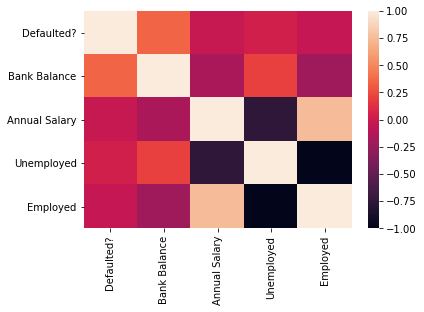

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'Defaulted?'}>,
        <AxesSubplot:title={'center':'Bank Balance'}>],
       [<AxesSubplot:title={'center':'Annual Salary'}>,
        <AxesSubplot:title={'center':'Unemployed'}>],
       [<AxesSubplot:title={'center':'Employed'}>, <AxesSubplot:>]],
      dtype=object)

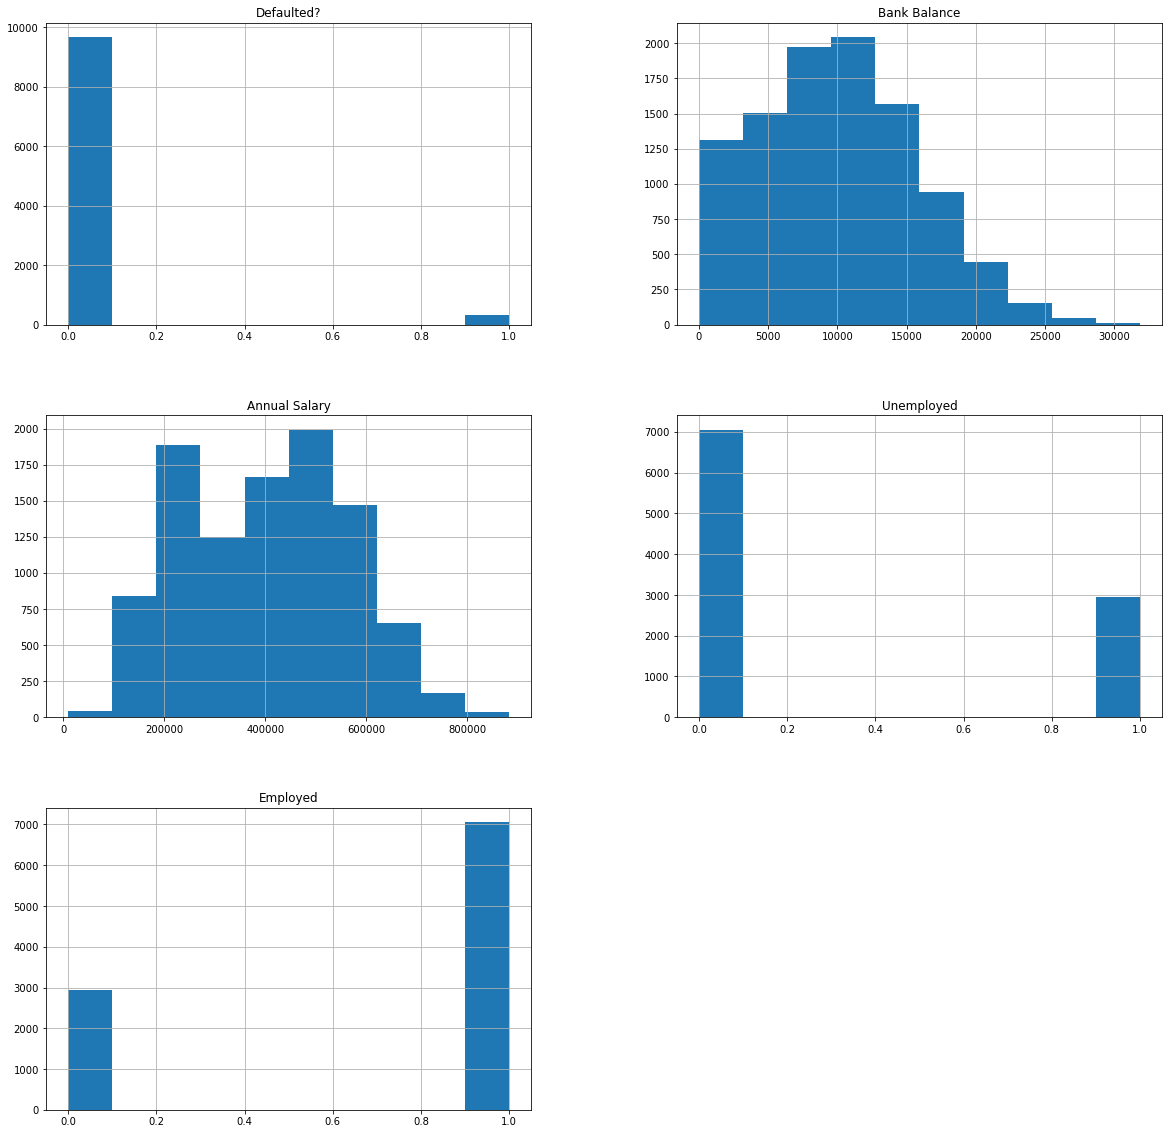

In [7]:
df.hist(figsize=(20,20))

In [8]:
X=df.drop(columns='Defaulted?')
Y=df['Defaulted?']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [10]:
from imblearn.over_sampling import SMOTE
X_train,Y_train=SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [11]:
from scipy import stats #标准化
X_train['Bank Balance']=stats.zscore(X_train['Bank Balance'])
X_train['Annual Salary']=stats.zscore(X_train['Annual Salary'])
X_test['Bank Balance']=stats.zscore(X_test['Bank Balance'])
X_test['Annual Salary']=stats.zscore(X_test['Annual Salary'])

In [12]:
from sklearn import linear_model
model=linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
print('accuracy is ',(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is  0.6024


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


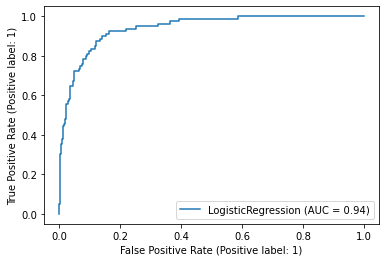

In [13]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


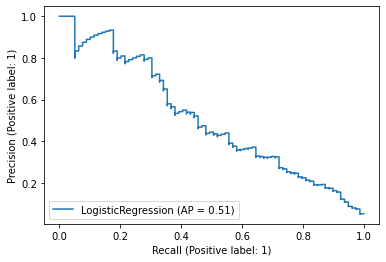

In [14]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
print('accuracy is ',(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is  0.7148


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


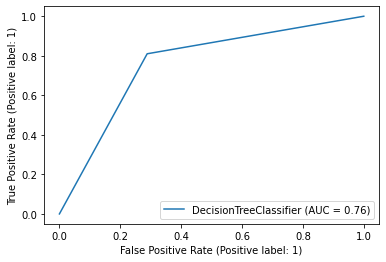

In [16]:
plot_roc_curve(model,X_test,Y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


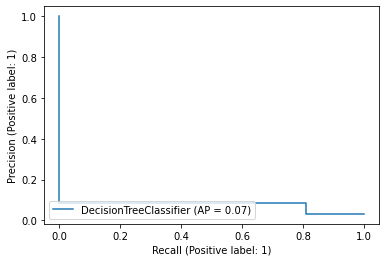

In [17]:
plot_precision_recall_curve(model,X_test,Y_test)

In [18]:
from sklearn import ensemble
model=ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
print('accuracy is ',(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is  0.6692


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


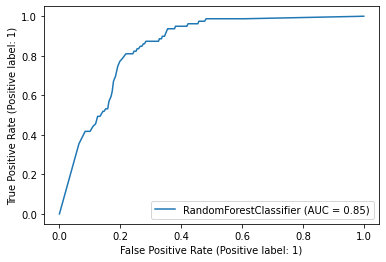

In [19]:
plot_roc_curve(model,X_test,Y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


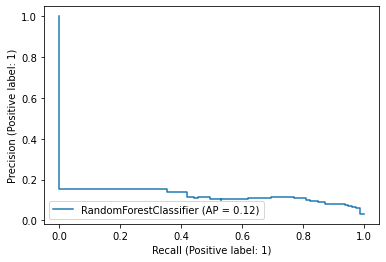

In [20]:
plot_precision_recall_curve(model,X_test,Y_test)

In [21]:
model=ensemble.GradientBoostingClassifier(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
print('accuracy is ',(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is  0.606


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


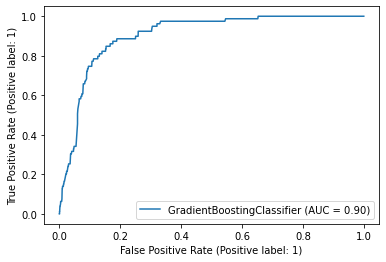

In [22]:
plot_roc_curve(model,X_test,Y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


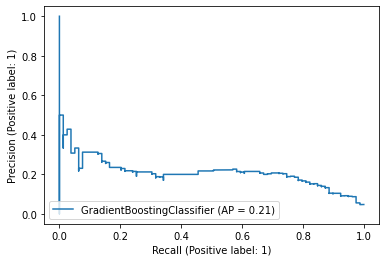

In [23]:
plot_precision_recall_curve(model,X_test,Y_test)

In [24]:
from sklearn import neural_network
model=neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
print('accuracy is ',(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is  0.5992


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


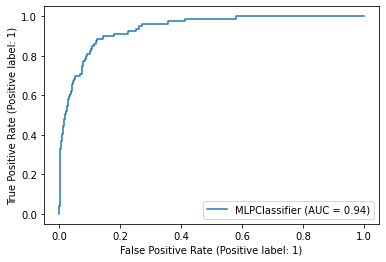

In [25]:
plot_roc_curve(model,X_test,Y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


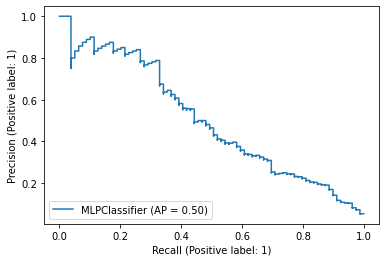

In [26]:
plot_precision_recall_curve(model,X_test,Y_test)

**Qestion: How to improve the results by change the features selected, data wrangling or parameter setting including using keras and tensorflow.**<br>
First, I try to build a neural network with 2 hidden layer by using keras.

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train,Y_train,batch_size=2,epochs=30)

Epoch 1/30
7246/7246 [==============================] - 5s 652us/step - loss: 0.3255 - accuracy: 0.8576
Epoch 2/30
7246/7246 [==============================] - 5s 650us/step - loss: 0.2855 - accuracy: 0.8703
Epoch 3/30
7246/7246 [==============================] - 5s 667us/step - loss: 0.2848 - accuracy: 0.8687
Epoch 4/30
7246/7246 [==============================] - 5s 696us/step - loss: 0.2808 - accuracy: 0.8693
Epoch 5/30
7246/7246 [==============================] - 7s 966us/step - loss: 0.2834 - accuracy: 0.8678
Epoch 6/30
7246/7246 [==============================] - 5s 688us/step - loss: 0.2809 - accuracy: 0.8688
Epoch 7/30
7246/7246 [==============================] - 5s 651us/step - loss: 0.2860 - accuracy: 0.8645
Epoch 8/30
7246/7246 [==============================] - 4s 614us/step - loss: 0.2819 - accuracy: 0.8681
Epoch 9/30
7246/7246 [==============================] - 4s 606us/step - loss: 0.2819 - accuracy: 0.8654
Epoch 10/30
7246/7246 [==============================] - 4s 607u

In [29]:
model.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 577us/step - loss: 1.2070 - accuracy: 0.5436


[1.2069958448410034, 0.5436000227928162]

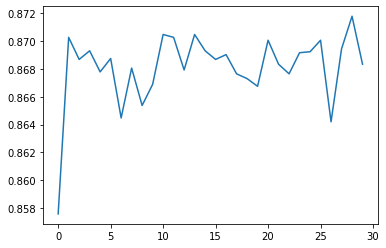

In [30]:
import matplotlib.pylab as plt
plt.plot(history.history["accuracy"])

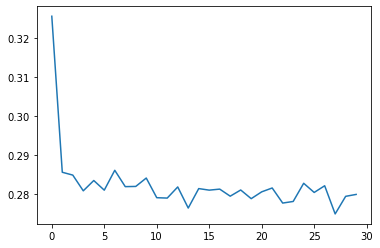

In [31]:
plt.plot(history.history["loss"])

However, based on the accuracy of the test data, we can conclude that the prediction result using keras is not very accurate. 

In order to have better result, I used autogluon to build a new model. Autogluon is based on auto machine learning structure. It can automatically conduct feature engineering, choose appropriate machine learning model and train the dataset. Generally, it applies the idea of stacking which uses different models and weights their results for an output.

In [33]:
from autogluon.tabular import TabularDataset,TabularPredictor

In [35]:
df_ip=pd.read_csv('Loan Default 2.csv')
df_ip=df_ip.drop(columns='Index')
df_ip.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [36]:
rows, cols = df_ip.shape
split_index = int(rows * 0.8)
df_train=df_ip.iloc[0: split_index, :]
df_test= df_ip.iloc[split_index:, :]
df_train.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [37]:
train_data=TabularDataset(df_train)
label='Defaulted?'
predictor=TabularPredictor(label=label).fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20220922_074930/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220922_074930/"
AutoGluon Version:  0.5.2
Python Version:     3.8.5
Operating System:   Darwin
Train Data Rows:    8000
Train Data Columns: 3
Label Column: Defaulted?
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6971.97 MB
	Train Data (Original)  Memory Usage: 0.19 MB (0.0% of available memory)
	Inferring data type of each fe

In [44]:
Y_train=df_train.iloc[:,3]
pred_train=predictor.predict(df_train)
cm_train=confusion_matrix(Y_train,pred_train)
print('train accuracy is ',(cm_train[0,0]+cm_train[1,1])/sum(sum(cm_train)))

train accuracy is  0.972125


In [43]:
Y_test=df_test.iloc[:,3]
pred_test=predictor.predict(df_test)
cm_test=confusion_matrix(Y_test,pred)
print('test data accuracy is ',(cm_test[0,0]+cm_test[1,1])/sum(sum(cm_test)))

test data accuracy is  0.973


We can see that the train accuracy and test accuracy are both very high, more than 97%. Thus, the autogluon model is very powerful and can be applied to this problem.

**Qualitatively, explain the pros and cons about your model. How to overcome the weakness of your model (future study)**<br>
*For neural network using keras:*<br>
Pros: We can design the structure of the neural network by ourselves. Do not need feature engineering.<br>
Cons: The accuracy is very low. Need to find better hyperparameters, the time of training a model is long.<br>
Overcome: Use grid search or bayesian optimization to find better hyperparameters.

*For Autogluon model:*<br>
Pros: It can automatically conduct feature engineering, choose appropriate machine learning model and train the dataset. Generally, it applies the idea of stacking which uses different models and weights their results for an output, which improves accuracy and avoid overfitting.<br>
Cons: Hard to explain the model.<br>
Overcome: Autogluon is an open source project, it can be stronger with more functions in the future.

**The important of your model to the bank**<br>
Our goal is to help the bank to predict the likelihood of customer having loan default. Since my model can complete the target with very high accuracy, the bank can use the model to decide whether to give a customer the loan or not. The model can improve the efficiency of loan process of the bank to initially filter out the potential customers who are more likely to pay back the loan. It can also give suggestions to the bank to avoid lending money to the customers who have high risk of default.